# STAT 301 Statistical Modelling for Data Science

# Assignment 4: Computational Code and Output

### Name: Tony Lee (24689788)

In [1]:
# Run this cell before continuing.
library(readr)
library(tidyverse)
library(repr)
library(infer)
library(dplyr)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(ggpubr)
library(leaps)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’

# Loading the Repositories data

In [2]:
repository_data <- read_csv("repositories.csv")
head(repository_data)

Rows: 215029 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Name, Description, URL, Homepage, Language, License, Topics, Defau...
dbl  (5): Size, Stars, Forks, Issues, Watchers
lgl  (9): Has Issues, Has Projects, Has Downloads, Has Wiki, Has Pages, Has ...
dttm (2): Created At, Updated At

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name                       
1 freeCodeCamp               
2 free-programming-books     
3 awesome                    
4 996.ICU                    
5 coding-interview-university
6 public-apis                
  Description                                                                             
1 freeCodeCamp.org's open-source codebase and curriculum. Learn to code for free.         
2 :books: Freely available programming books                                              
3 😎 Awesome lists about all kinds of interesting topics                                  
4 Repo for counting stars and contributing. Press F to pay respect to glorious developers.
5 A complete computer science study plan to become a software engineer.                   
6 A collective list of free APIs                                                          
  URL                                                       Created At         
1 https://github.com/freeCodeCamp/freeCodeCamp              2014-12-24 17:49:19
2 https://github.com/EbookFoundation/free-programming-books 2013-10-11 06:50:37
3 https://github.com/sindresorhus/awesome                   2014-07-11 13:42:37
4 https://github.com/996icu/996.ICU                         2019-03-26 07:31:14
5 https://github.com/jwasham/coding-interview-university    2016-06-06 02:34:12
6 https://github.com/public-apis/public-apis                2016-03-20 23:49:42
  Updated At          Homepage                                                 
1 2023-09-21 11:32:33 http://contribute.freecodecamp.org/                      
2 2023-09-21 11:09:25 https://ebookfoundation.github.io/free-programming-books/
3 2023-09-21 11:18:22 NA                                                       
4 2023-09-21 08:09:01 https://996.icu                                          
5 2023-09-21 10:54:48 NA                                                       
6 2023-09-21 11:22:06 http://public-apis.org                                   
  Size   Stars  Forks Issues ⋯ Has Issues Has Projects Has Downloads Has Wiki
1 387451 374074 33599   248  ⋯  TRUE       TRUE        TRUE          FALSE   
2  17087 298393 57194    46  ⋯  TRUE      FALSE        TRUE          FALSE   
3   1441 269997 26485    61  ⋯  TRUE      FALSE        TRUE          FALSE   
4 187799 267901 21497 16712  ⋯ FALSE      FALSE        TRUE          FALSE   
5  20998 265161 69434    56  ⋯  TRUE      FALSE        TRUE          FALSE   
6   5088 256615 29254   191  ⋯  TRUE      FALSE        TRUE          FALSE   
  Has Pages Has Discussions Is Fork Is Archived Is Template Default Branch
1  TRUE     FALSE           FALSE   FALSE       FALSE       main          
2  TRUE     FALSE           FALSE   FALSE       FALSE       main          
3  TRUE     FALSE           FALSE   FALSE       FALSE       main          
4 FALSE     FALSE           FALSE    TRUE       FALSE       master        
5 FALSE     FALSE           FALSE   FALSE       FALSE       main          
6 FALSE     FALSE           FALSE   FALSE       FALSE       master

## Brief description of data

According to the structure above, the dataframe `repository_data` has 215029 rows and 24 variables. This dataset contains information about repositories posted on the GitHub website. It includes detailed information such as the specific address of a repository or background information related to it. The dataset provides details on the number of times an individual has accessed the repository, the number of likes or times it has been forked, as well as the creation and update dates of the repository.

The dataset contains data on information of repositories from dataset, Among many variables available we will use the following:

- `Name`: The name of the GitHub repository

- `Description`: A brief textual description that summarizes the purpose or focus of the repository

- `URL`: The URL or web address that links to the GitHub repository, which is a unique identifier for the repository

- `Created At`: The date and time when the repository was initially created on GitHub, in ISO 8601 format

- `Updated At`: The date and time of the most recent update or modification to the repository, in ISO 8601 format

- `Homepage`: The URL to the homepage or landing page associated with the repository, providing additional information or resources

- `Size`: The size of the repository in bytes, indicating the total storage space used by the repository's files and data

- `Stars`: The number of stars or likes that the repository has received from other GitHub users, indicating its popularity or interest

- `Forks`: The number of times the repository has been forked by other GitHub users

- `Issues`: The total number of open issues

- `Watchers`: The number of GitHub users who are "watching" or monitoring the repository for updates and changes

- `Language`: The primary programming language

- `License`: Information about the software license using a license identifier

- `Topics`: A list of topics or tags associated with the repository, helping users discover related projects and topics of interest

- `Has Issues`: A boolean value indicating whether the repository has an issue tracker enabled or not.

- `Has Projects`: A boolean value indicating whether the repository uses GitHub Projects to manage and organize tasks and work items

- `Has Downloads`: A boolean value indicating whether the repository offers downloadable files or assets to users

- `Has Wiki`: A boolean value indicating whether the repository has an associated wiki with additional documentation and information

- `Has Pages`: A boolean value indicating whether the repository has GitHub Pages enabled, allowing the creation of a website associated with the repository

- `Has Discussions`: A boolean value indicating whether the repository has GitHub Discussions enabled, allowing community discussions and collaboration

- `Is Fork`: A boolean value indicating whether the repository is a fork of another repository. In this case, it's false, meaning it is not a fork

- `Is Archived`: A boolean value indicating whether the repository is archived. Archived repositories are typically read-only and are no longer actively maintained 

- `Is Template`: A boolean value indicating whether the repository is set up as a template

- `Default Branch`: The name of the default branch

## Variable of project question

#### Response Variable (Y):
- `Forks`: Represents the number of times the repository has been forked by other users on GitHub. Definition of fork is the process of copying a repository from other user's account to another, allowing them to freely use with any changes without affecting the original. A high number of forks can represent a project's utility, popularity, or the collaborative quality it has generated.

#### Explanatory Variables (X):
- `Stars`: Indicates the number of stars or likes that the repository has received on GitHub. Stars are a way for users to mark a repository as a favorite, showing appreciation or a bookmark for interesting projects. It can reflect the popularity or quality of the repository's content among the GitHub community.

- `Issues`: Counts the number of issues that have been reported in the repository. Issues are a great way for the community to track tasks, enhancements, and bugs associated with the repository.

- `Language`: indicates the programming language of the GitHub repository. It is a categorical variable because programming languages are distinct and typically non-ordinal categories, such as Python, JavaScript, or Ruby. In your regression model, this variable allows us to assess how the language of a project may influence its popularity or usage

- `Size`: shows the number of stars or likes the repository has received on GitHub. Stars serve as endorsements or bookmarks for projects.  is often a measure of popularity or perceived quality and can be indicative of how likely a repository is to be forked.

- `Watchers`: indicates the number of users who have chosen to be notified about activities in a repository. It is a continuous variable reflecting the level of active interest in the repository.

## project question

> "Is there an association between the number of Forks a GitHub repository has and best fit of exploratory variables and individual language? Additionally, is there an interaction effect between exploratory variables and categorical variable of Language?"

When using regression models to make inferences, it is not about arbitrarily choosing input variables, but rather selecting those that enhance the model's fit and help control potential errors. After identifying these exploratory variables, I plan to consider them with the categorical variable `Language` and the response variable `Forks` to determine if there are statistically significant associations and interactions.

# Exploratory Data Analysis

## Wrangling Data

In [3]:
# filter only the necessary data
set.seed(12423)
project_data <- read_csv("repositories.csv") %>%
            select(Name, Forks, Stars, Issues, Size, Watchers, Language, `Has Issues`, `Is Fork`) %>%
            filter(`Has Issues` == TRUE, 
                   `Is Fork` == FALSE,
                   !is.na(Language),
                   !is.na(Size))

# create the dummy variable
project_data$Language <- as.factor(project_data$Language)

head(project_data)

Rows: 215029 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Name, Description, URL, Homepage, Language, License, Topics, Defau...
dbl  (5): Size, Stars, Forks, Issues, Watchers
lgl  (9): Has Issues, Has Projects, Has Downloads, Has Wiki, Has Pages, Has ...
dttm (2): Created At, Updated At

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name                 Forks Stars  Issues Size    Watchers Language  
1 freeCodeCamp         33599 374074  248    387451 374074   TypeScript
2 public-apis          29254 256615  191      5088 256615   Python    
3 developer-roadmap    34927 251416  643   2267461 251416   TypeScript
4 system-design-primer 40474 229569  393     11187 229569   Python    
5 react                44842 213299 1497    345964 213299   JavaScript
6 vue                  34385 205326  649     31925 205326   TypeScript
  Has Issues Is Fork
1 TRUE       FALSE  
2 TRUE       FALSE  
3 TRUE       FALSE  
4 TRUE       FALSE  
5 TRUE       FALSE  
6 TRUE       FALSE

**Interpretation** :

I have organized only the necessary data for progressing with the project. Additionally, this dataset includes a variable `Has Issues` that indicates whether the repositories have the issue tracker enabled or not, and a `Is Fork` variable that reveals whether a repository has been forked from another file. In this context, if the issue tracker is enabled, then `Has Issues == TRUE`, and if the repository is an original and not a fork, then `Is Fork == FALSE`. Furthermore, because the Size variable contains excessively large values, I have converted the units from bytes to kilobytes for this analysis. And I have created dummy variables from the categorical variable "Language" to enable comparison with other variables.

In [4]:
# remove any missing values
project_data <- na.omit(project_data)

# check for any missing values
sum(is.na(project_data))

[1] 0

In [5]:
# Summary of project_data set
summary(project_data)

     Name               Forks              Stars            Issues        
 Length:193025      Min.   :     0.0   Min.   :   167   Min.   :    0.00  
 Class :character   1st Qu.:    39.0   1st Qu.:   236   1st Qu.:    3.00  
 Mode  :character   Median :    79.0   Median :   374   Median :   11.00  
                    Mean   :   224.8   Mean   :  1087   Mean   :   39.52  
                    3rd Qu.:   171.0   3rd Qu.:   787   3rd Qu.:   31.00  
                    Max.   :142778.0   Max.   :374074   Max.   :26543.00  
                                                                          
      Size              Watchers            Language     Has Issues    
 Min.   :        0   Min.   :   167   Python    :33649   Mode:logical  
 1st Qu.:      439   1st Qu.:   236   JavaScript:31029   TRUE:193025   
 Median :     2581   Median :   374   Java      :14607                 
 Mean   :    47855   Mean   :  1087   TypeScript:11476                 
 3rd Qu.:    15521   3rd Qu.:   787   C+

# Range of numerical variable

| Variable Name  | Description |Range|
|----------------|-----------------------------------------------------------------------------------------------|----|
| Forks          |The number of times the repository has been forked by other GitHub users  | [0, 88940]|
| Stars          |The number of stars or likes that the repository has received from other GitHub users, indicating its popularity or interest| [167, 374074]|
| Issues      |The total number of open issues                                        |[0, 26543]|
| Size |The size of the repository in bytes, indicating the total storage space used by the repository's files and data                                        | [0, 102422.11]|
| Watchers |The number of GitHub users who are "watching" or monitoring the repository for updates and changes                                       | [167, 374074]|


**Interpretation** :


Since this dataset contains 215k observations, based on a summary of information for each variable, I plan to set the categories for the variables to be used in the upcoming project to be equal to or less than the 3rd quartile for each variable. Additionally, for the categorical variable `Language`, I plan to specify only the top 5 most common languages.

**Additional Description from Feeback:**

The reason for the plan set below the 3rd quartile is to investigate the representative range of variables. This is because if a particular variable has extremely high values, it can affect the analysis results and be biased. Therefore, it may be appropriate to analyze the values of variables more generally by setting the range below the 3rd quartile.


# Visualization

In [6]:
# Set up seed
set.seed(12423)

# Sampling the data set with appropriate range of value
repository_sample1000 <- project_data |>
                         filter(Forks <= 180.0, 
                                Stars <= 800, 
                                Issues <= 33.00,
                                Size <= 15521, 
                                Watchers <= 800,
                                Language %in% c("Python", "JavaScript", "Java")) |>
                         sample_n(size = 1000) |>
                         select(-`Has Issues`, - `Is Fork`)

# Display the data set
head(repository_sample1000)

Name                                       Forks Stars Issues Size Watchers
1 webpack-md5-hash                            35   210   10       19 210     
2 generate-bitbirds                           86   282    1      428 282     
3 QQzone_crawler                              42   195    0      234 195     
4 homebridge-http-switch                      34   201    9      250 201     
5 wheelnav                                   103   690    1     2933 690     
6 Deep-Virtual-Try-on-with-Clothes-Transform 107   322   14     7982 322     
  Language  
1 JavaScript
2 Python    
3 Python    
4 JavaScript
5 JavaScript
6 Python

**Interpretation** :

As mentioned earlier, after setting the range of each variable to the 3rd quartile value and proceed with making sample. Unnecessary variables for visualization have been removed using the `select()`, and the size of the sample set for visualization has been set to 1000. Additionally, selecting only the top 5 languages has aided in the visualization process.

Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”


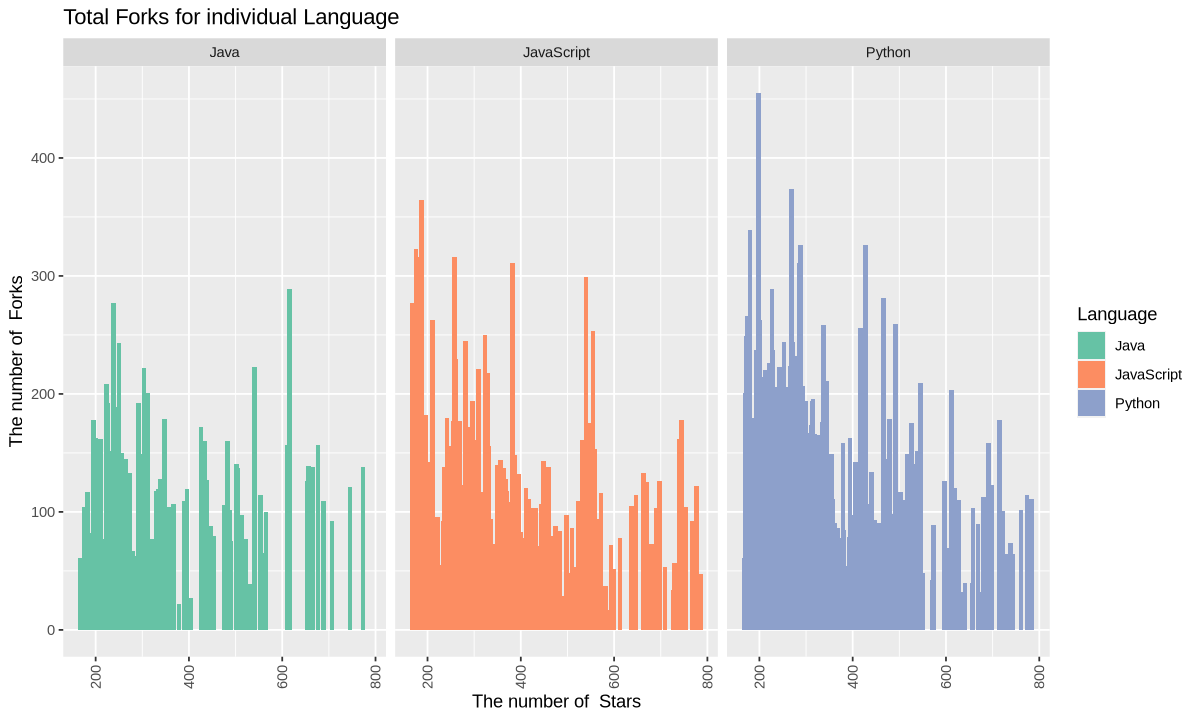

Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”


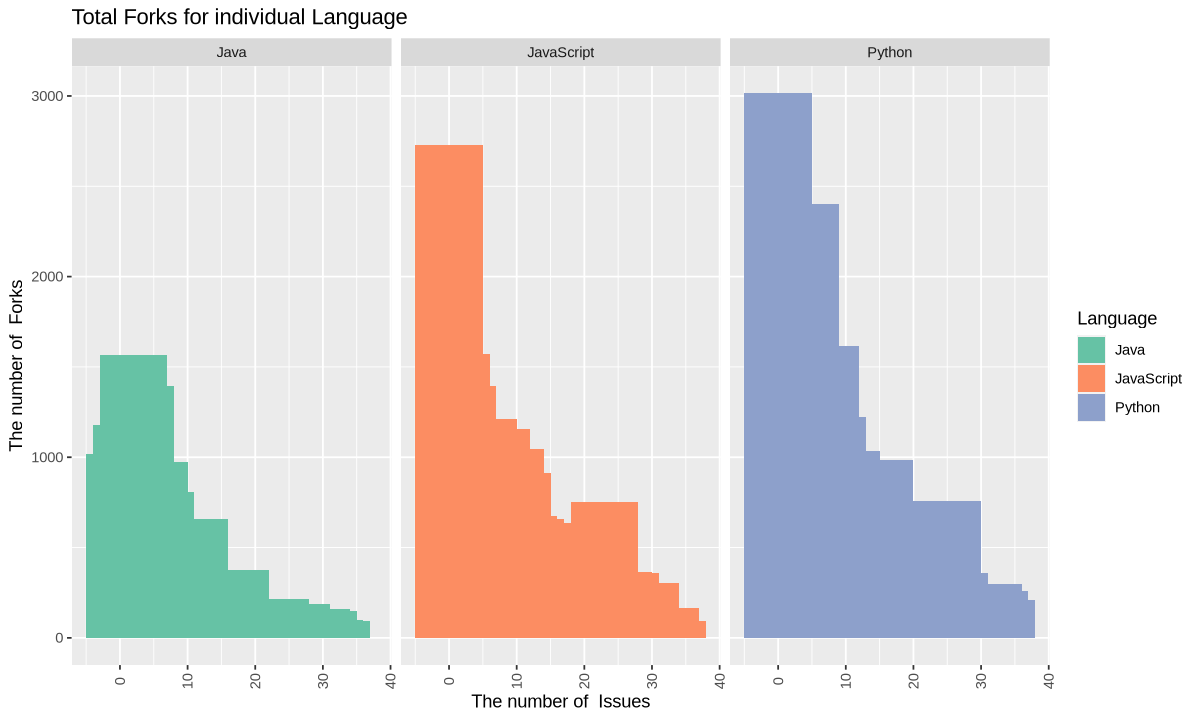

Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”


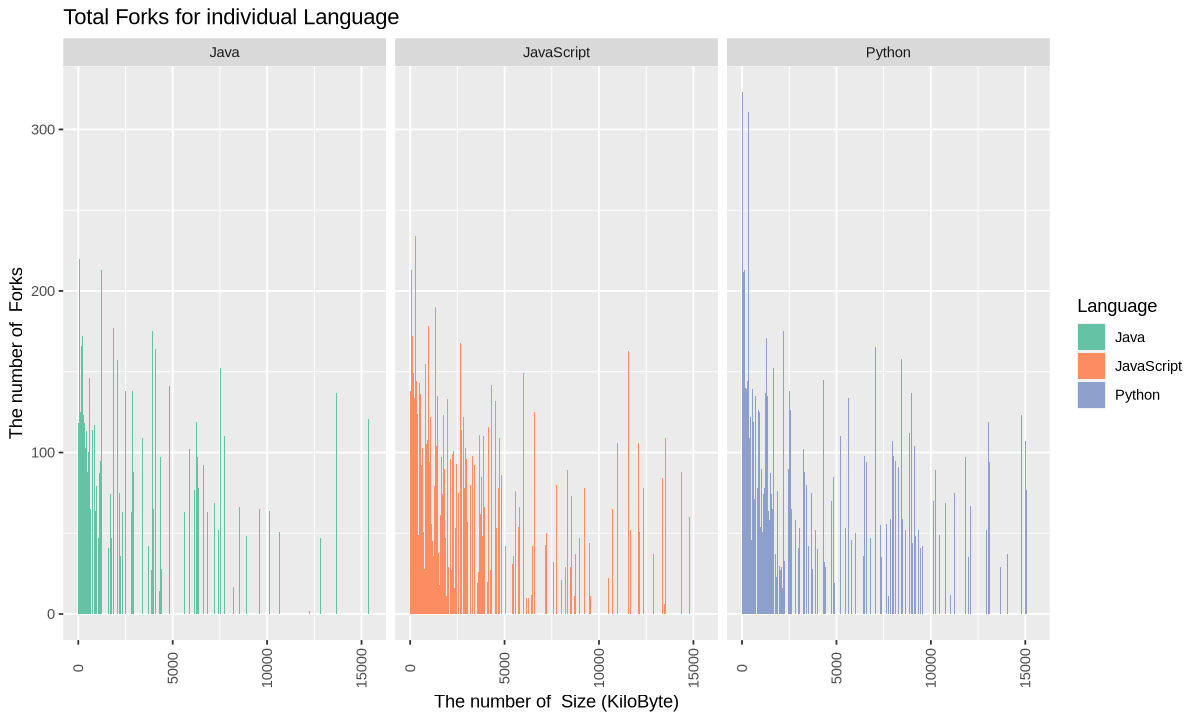

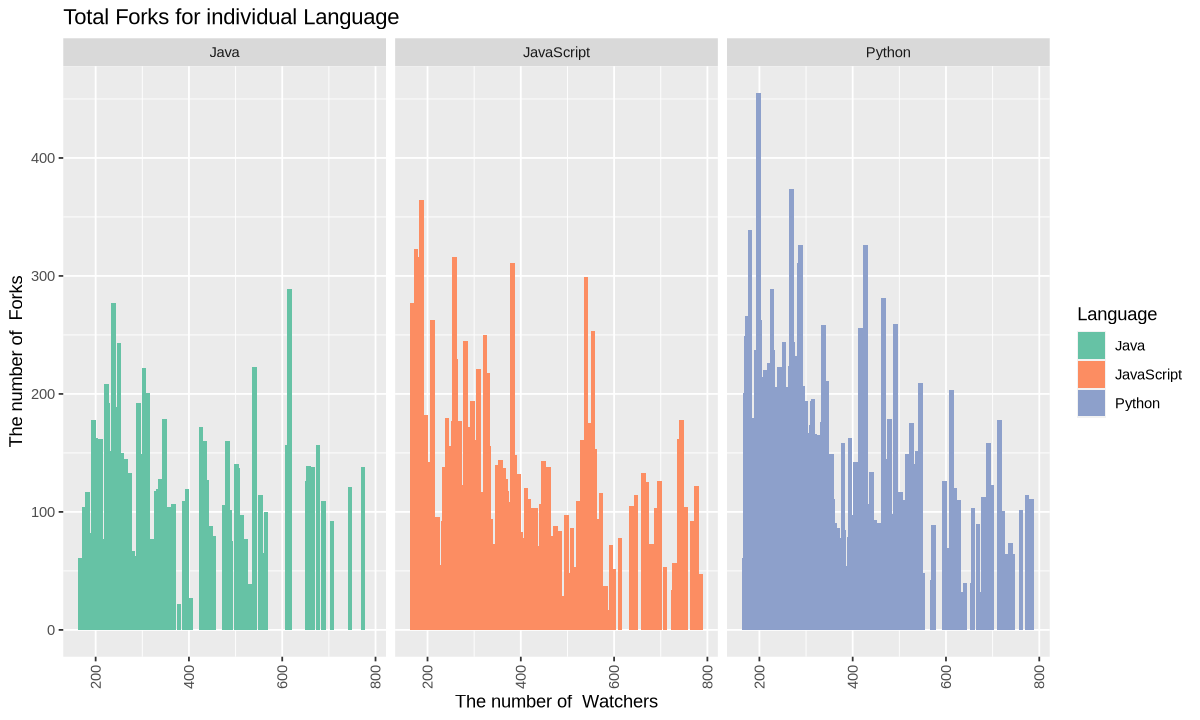

In [7]:
# Set up the plot size
options(repr.plot.width=10, repr.plot.height=6)

# Create the bar plot with Stars and Forks by individual Language
Star_chart <- ggplot(repository_sample1000, aes(x = Stars, y = Forks, fill = Language)) +
  geom_bar(stat = "identity", width = 10) +
  facet_wrap(~ Language, nrow = 1) +
  labs(title = "Total Forks for individual Language",
       x = "The number of  Stars",
       y = "The number of  Forks") +
  scale_fill_brewer(palette = "Set2") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

# Display the Star_chart
Star_chart

# Create the bar plot with Issues and Forks by individual Language
Issue_chart <- ggplot(repository_sample1000, aes(x = Issues, y = Forks, fill = Language)) +
  geom_bar(stat = "identity", width = 10) +
  facet_wrap(~ Language, nrow = 1) +
  labs(title = "Total Forks for individual Language",
       x = "The number of  Issues",
       y = "The number of  Forks") +
  scale_fill_brewer(palette = "Set2") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

# Display the Issue_chart
Issue_chart

# Create the bar plot with Size and Forks by individual Language
Size_chart <- ggplot(repository_sample1000, aes(x = Size, y = Forks, fill = Language)) +
  geom_bar(stat = "identity", width = 40) +
  facet_wrap(~ Language, nrow = 1) +
  labs(title = "Total Forks for individual Language",
       x = "The number of  Size (KiloByte)",
       y = "The number of  Forks") +
  scale_fill_brewer(palette = "Set2") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

# Display the Size_chart
Size_chart

# Create the bar plot with Watchers and Forks by individual Language
Watchers_chart <- ggplot(repository_sample1000, aes(x = Watchers, y = Forks, fill = Language)) +
  geom_bar(stat = "identity", width = 10) +
  facet_wrap(~ Language, nrow = 1) +
  labs(title = "Total Forks for individual Language",
       x = "The number of  Watchers",
       y = "The number of  Forks") +
  scale_fill_brewer(palette = "Set2") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

# Display the Watchers_chart
Watchers_chart

Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”


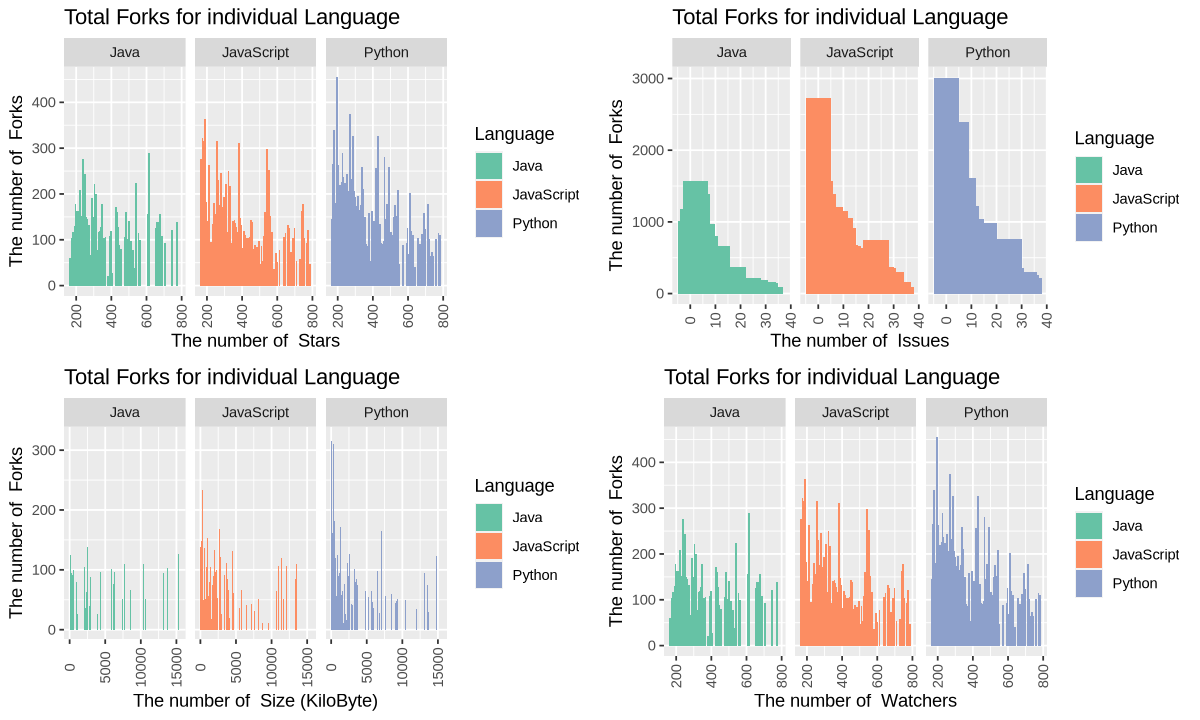

In [8]:
# Visualize multiple graphs in one time
plot_grid(Star_chart, Issue_chart, Size_chart, Watchers_chart)

**Interpretation** :

This bar charts are importantly organized to address the project question of whether there is an association between the number of Forks a GitHub repository has and various exploratory variables, especially when analyzed by individual language. By setting the range to the 3rd quartile for each variable to create the sample, it helps to avoid potential issues and distortion of representativeness due to extreme values. The bar plots provide a direct visual comparison between the number of Forks and each exploratory variable, investigated by language. This allows for the identification of potential patterns or anomalies that could suggest an interaction effect, indicating that the influence of exploratory variables on the number of Forks may be conditioned by the repository's language.

Additionally, this box plot shows that the Stars and Watchers variables have the same distribution. Earlier data summaries indicated that `Stars` and `Watchers` tend to have the same values, and through box plot visualization, it helps to compare them directly. It can also check whether a storage using a particular programming language tends to have a higher Forks number than other languages.

However, the sample used for this visualization can be difficult to trust statistically because they are random and do not cosinder any assumptions. Especially when comparing the number of Forks by language and the relationship between other variables, there is a possibility that the selected sample may not be representative  of the actual overall data. Converting the Size variable to kilobytes does facilitate the interpretation of the data, but this also must be considered for potential loss or distortion of information.

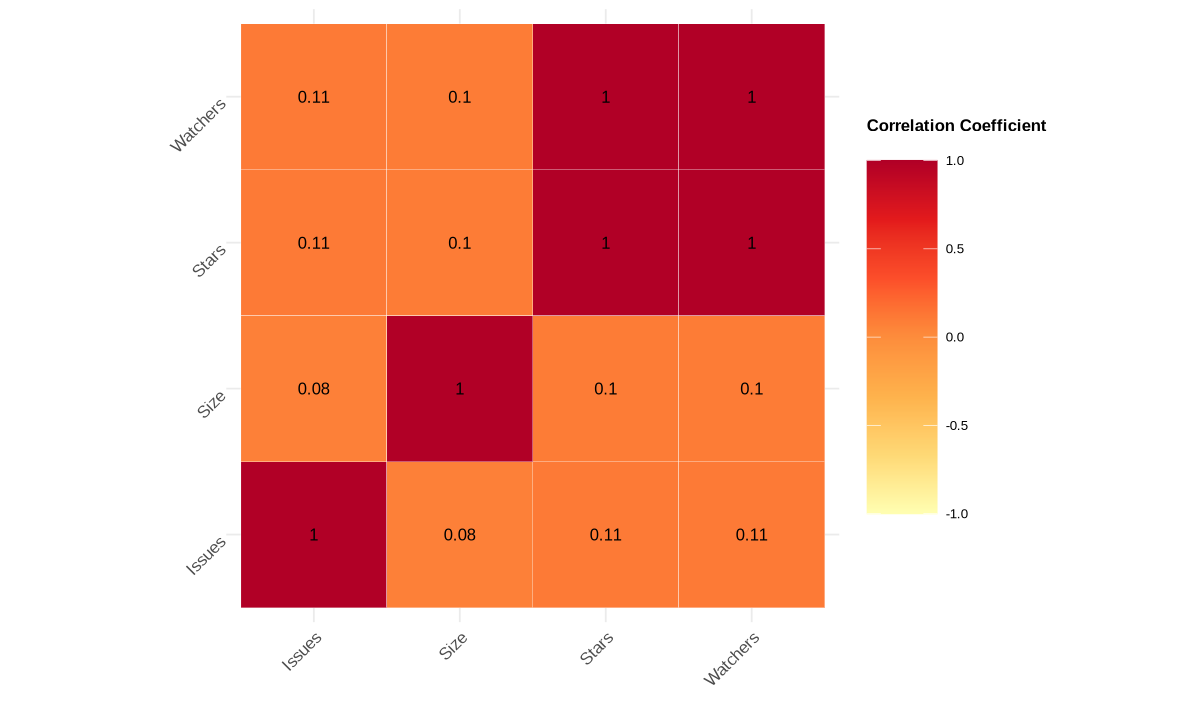

In [9]:
# visualize pairwise correlation coefficients between all input variables is to use a heatmap
corr_matrix_CASchools <- repository_sample1000 %>%
  select_if(is.numeric) %>%
  select(- Forks) %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("variable1") %>%
  pivot_longer(-variable1, names_to = "variable2", values_to = "correlation")

# visualize pairwise correlation coefficients between all input variables is to use a heatmap
plot_corr_matrix_CAschools <- corr_matrix_CASchools %>%
  ggplot(aes(variable1, variable2, fill = correlation)) +
  geom_tile(color = "white") +
  scale_fill_distiller("Correlation Coefficient \n", palette = "YlOrRd", direction = 1, limits = c(-1, 1)) +
  labs(x = "", y = "") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size = 10),
    axis.text.y = element_text(angle = 45, vjust = 1, hjust=1, size = 10),
    legend.title = element_text(size = 10, face = "bold"),
    legend.key.size = unit(1.5, "cm"), 
    legend.text = element_text(size = 8) 
  ) +
  coord_fixed() +
  geom_text(aes(label = round(correlation, 2)), color = "black", size = 3.5) # adjust the size of the text here

# Display the heat map
plot_corr_matrix_CAschools

**Interpretation** :

Lastly, This heatmap was added to evaluate multicollinearity in our dataset. Multicollinearity refers to the degree of correlation between explanatory variables and is included in the visualization because it can affect the stability and interpretability of the regression model. Based on this correlation visualization, the previously mentioned `Stars` is consistent with `Watchers`, so the correlation plot seems to indicate 1. This heatmap should be considered carefully because high multicollinearity can inflate the variance of the regression coefficient estimation and does not cause the estimate to become appropriate as a result of model changes.

# Method and Plan

- `backward selection algorithm`

Many potential input variables are available in the dataset, not all of variables may be relevant to explain the variation of `Forks`, so Backward selection algorithm excludes irrelevant variables and creates a more generative model compared to MLR in this project.



I plan to use a backward selection algorithm by dividing two different datasets (selection and training set) on a 70-30% basis since same data set can not be used to select and make on inference. Among the remaining continuous variables, excluding categorical variables, I aim to decide the number of input variables and which variables to select to create a good generative model, based on the adjusted coefficient of determination (adjusted $R^2$) to select a smaller model. 


- `Inference`

Inference can objectively determine whether to reject the null hypothesis by comparing the p-value to a predetermined level of significance using statistical tests, the results obtained from the dataset for the questions required by this project can be estimated.


The main focus of this project is to investigate two major topics: the impact of input variables on a response variable and the interaction effects between these variables. Consequently, for both topics, null and alternative hypotheses will be established, and inference will be made by comparing p-values at an appropriate significance level. In this project, I am going to set up the significance level is 0.05.

#### Project Question 1:
> Is there an association between the number of Forks a GitHub repository has and best fit of exploratory variables and individual language?

**Null Hypothesis($H_0$)** : There is no significant association between the number of forks a GitHub repository has and the exploratory variables


- `F-test`

F-test can be used to test simultaneously whether the additional parameters in the full model are zero. In this project's additional question, so I can use F-test to test the significance of the fitted model over the null model to measure the interaction model fit the data.

I plan to generate linear regression for both the Full model(include interaction model) and the Reduced model(additive model) using the dataset. Then, by applying ANOVA, I will compare the resulting p-values with a predetermined significance level to determine if there is a statistically significant difference.


#### Project Question 2:
> Is there an interaction effect between exploratory variables and categorical variable of Language?

**Null Hypothesis($H_0$)** : There is no interaction effect between the exploratory variables and the categorical variable of Language on the response variable

## Assumption for Multiple Linear Regression

- `L`: Linear Relation
> The relationship between input variables and response variable `Fork` should be linear.

- `I`: Errors are independent and identical distributed
> The errors (residuals) should be independent each other.

- `N`: Conditional distribution of the error term is Normal
> It can prove that the conditional expectation is linear if the conditional distribution of the error is Normal (diagnose this problem by Q-Q plot)

- `E`: Equal variance of the error terms
> If the errors are equal variance (homoscedastic), the residuals should show equal variation for all fitted values

- `Multicollinearity`: Correlation between input variables
> In Deliverable 2, I statiscally found that the exploratory variable of `Watchers` and `Stars` and are same and highest correlation with 1 in the Heat Map. The Variance Inflation Factor (VIF) can be calculated and reviewed multicollinearity.

## potential limitations or weaknesses of the method

- `Assumption violation`

Violation of the assumption of linear regression may cause in bias or less reliable results and may not be called a generative model.

- `Limitation of predetermined significance level`

In general, significance levels follow statistically considered criteria, such as 0.05 or 0.01, and were designated 0.05 in this project. However, these levels are not appropriate for all situations, and may be inappropriate depending on the context of the data or study.

- `Reverse Casuality`: 

Regression models can be used to infer causal relationships, but there is a possibility that the response variable may affect the input variable rather than the input variable actually affects the response variable

# Implementation of a proposed model

### Part one : Choose variables for generative model (Backward Selection)

In [12]:
variable_selection <- repository_sample1000 |>
                      select(-Name, -Language)

head(variable_selection)

Forks Stars Issues Size Watchers
1  35   210   10       19 210     
2  86   282    1      428 282     
3  42   195    0      234 195     
4  34   201    9      250 201     
5 103   690    1     2933 690     
6 107   322   14     7982 322

In [13]:
repo_backward_sel <- regsubsets(
  x=Forks ~ ., 
  nvmax= 3,
  data= variable_selection,
  method= "backward",
)

repo_bwd_summary <- summary(repo_backward_sel)

repo_bwd_summary_df <- data.frame(
   n_input_variables = 1:3,
   RSQ = repo_bwd_summary$rsq,
   RSS = repo_bwd_summary$rss,
   ADJ.R2 = repo_bwd_summary$adjr2
)

repo_bwd_summary

repo_bwd_summary_df

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


Subset selection object
Call: regsubsets.formula(x = Forks ~ ., nvmax = 3, data = variable_selection, 
    method = "backward", )
4 Variables  (and intercept)
         Forced in Forced out
Stars        FALSE      FALSE
Issues       FALSE      FALSE
Size         FALSE      FALSE
Watchers     FALSE      FALSE
1 subsets of each size up to 3
Selection Algorithm: backward
         Stars Issues Size Watchers
1  ( 1 ) "*"   " "    " "  " "     
2  ( 1 ) "*"   "*"    " "  " "     
3  ( 1 ) "*"   "*"    "*"  " "     

n_input_variables RSQ       RSS     ADJ.R2   
1 1                 0.1024566 1436490 0.1015573
2 2                 0.1096154 1425033 0.1078293
3 3                 0.1108497 1423058 0.1081715

**Interpretation:**

From the Heat Map, I statiscally found that Stars and Watchers have highest correlation with 1 and there is 1 linear dependencies found. According to Backward Selection and Adjusted $R^2$, I am going to simulate the inference model with variable of Stars, Issues, Size, and categorical variable Language 

### Part two : Simulate Inference with F-Test

#### Recall the Project Question
> Is there an interaction effect between exploratory variables and categorical variable of Language?

**Null Hypothesis($H_0$)** : There is no interaction effect between the exploratory variables and the categorical variable of Language on the response variable

In this moment, I would like to choose the primary one to work on for Deliverable 4. Thus, I will use an F-test to analyze whether there are any interactions among the variables that affect the response variable `Forks`.

#### compare the following nested models:

**Full Model:** $β_0$ + $β_1$Stars + $β_2$Issues + $β_3$Size + $β_4$Language + $β_5$Stars•Issues + $β_6$Stars•Size + $β_7$Issues*Size + $β_8$Stars•$Language_{Java}$ + $β_9$Stars•$Language_{JavaScript}$ + $β_{10}$Issues•$Language_{Java}$ + $β_{11}$Issues•$Language_{JavaScript}$ + $β_{12}$Size•$Language_{Java}$ + $β_{13}$Size•$Language_{JavaScript}$ + $β_{14}$Stars•Issues•Size + $β_{15}$Stars•Issues•$Language_{Java}$ + $β_{16}$Stars•Issues•$Language_{JavaScript}$ + $β_{17}$Stars•Size•$Language_{Java}$ + $β_{18}$Stars•Size•$Language_{JavaScript}$ + $β_{19}$Issues•Size•$Language_{Java}$ + $β_{20}$Issues•Size•$Language_{JavaScript}$ + $β_{21}$Stars*Issues•Size•$Language_{Java}$ + $β_{22}$Stars•Issues•Size•$Language_{JavaScript}$ + $ε_{t}$

**Reduced Model:** $β_0$ + $β_1$Stars + $β_2$Issues + $β_3$Size + $ε_{t}$

The hypotheses using F-test is $H_0$ : $β_4$ = $β_5$ = $β_6$ ... $β_{22}$ = 0 vs $H_1$ :at least one $β_j$ $\neq$ 0 for j = 4, 5, 6 ... 22 

In [17]:
# Create the full and reduced model for investigating the interaction effects
Full_model <- lm(Forks ~ Stars + Issues + Size ,data = repository_sample1000)       
Reduced_model <- lm(Forks ~ Stars * Issues * Size * Language ,data = repository_sample1000)

#Compare two models with Anova
F_test_results <- anova(Full_model, Reduced_model)



### Results

In [18]:
#Visualize the result
F_test_results

Res.Df RSS     Df Sum of Sq F        Pr(>F)     
1 996    1423058 NA       NA        NA          NA
2 976    1341013 20 82044.69  2.985639 1.21735e-05

### brief interpretation of the results

Based on the F-test results, the full model with interaction terms illustrates statistically significant improvement in fit over the reduced model (because p-value = 1.21735e-05 < significance level of 0.05), leading to reject the null hypothesis. It can be interpreted that at least one interaction term affects the response variable 'Forks' and that the interaction between the navigation variable and the 'Language' categorical variable actually exists and provides answers to project questions. However, as we can see, considering the interaction between three continuous variables and categorical variable with three categories, I have confirmed that many linear regression coefficients should be compared and also consider the potential problems or errors that may arise.